In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline

In [63]:
book_df = pd.read_csv("Data/BX-Books.csv", sep=";", on_bad_lines="skip", encoding="latin-1")
book_df.columns = ["ISBN", "bookTitle", "bookAuthor", "yearOfPublication", "publisher", "imageUrlS", "imageUrlM", "imageUrlL"]
users_df = pd.read_csv("Data/BX-Users.csv", sep=";", on_bad_lines="skip", encoding="latin-1")
users_df.columns = ["userID", "Location", "Age"]
ratings_df = pd.read_csv("Data/BX-Book-Ratings.csv", sep=";", on_bad_lines="skip", encoding="latin-1")
ratings_df.columns = ["userID", "ISBN", "bookRating"]

C:\Users\ADEGOKE\AppData\Local\Temp\ipykernel_14044\630403356.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book_df = pd.read_csv("Data/BX-Books.csv", sep=";", on_bad_lines="skip", encoding="latin-1")


In [64]:
print(ratings_df.shape)
print(list(ratings_df.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


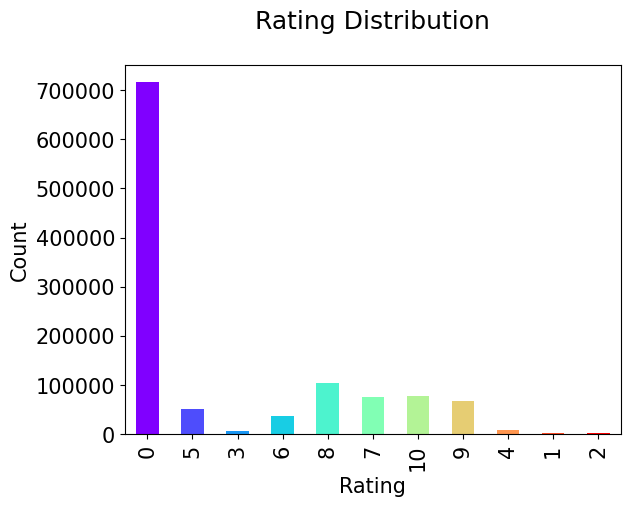

In [65]:
counts = ratings_df.bookRating.value_counts(sort=False)
colors = plt.cm.rainbow(np.linspace(0, 1, len(counts)))
plt.rc("font", size=15)
counts.plot(kind='bar', color=colors)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()


In [66]:
print(book_df.shape)
print(list(book_df.columns))

(271359, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [67]:
print(users_df.shape)
print(list(users_df.columns))

(278858, 3)
['userID', 'Location', 'Age']


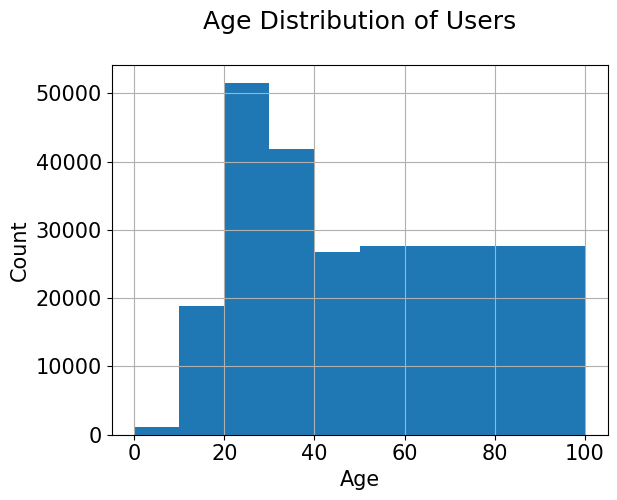

In [68]:
users_df.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title("Age Distribution of Users\n")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [69]:
counts_users = ratings_df["userID"].value_counts()
ratings_df = ratings_df[ratings_df["userID"].isin(counts_users[counts_users >= 200].index)]
counts_books = ratings_df["bookRating"].value_counts()
ratings_df = ratings_df[ratings_df["bookRating"].isin(counts_books[counts_books >= 100].index)]

In [70]:
combine_book_ratings = pd.merge(ratings_df, book_df, on="ISBN")
columns_df = ["yearOfPublication", "publisher", "imageUrlS", "imageUrlM", "imageUrlL"]
combine_book_ratings = combine_book_ratings.drop(columns_df, axis=1)
combine_book_ratings.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll
2,277427,003008685X,8,Pioneers,James Fenimore Cooper
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens


In [71]:
combine_book_ratings = combine_book_ratings.dropna(axis=0, subset=["bookTitle"])
book_ratingsCount = (combine_book_ratings.groupby
                     (by = ["bookTitle"])["bookRating"].count().
                     reset_index().rename(columns={"bookRating": "totalRatingCount"})
                     [["bookTitle", "totalRatingCount"]])
book_ratingsCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [72]:
rating_with_totalRatingCount = combine_book_ratings.merge(book_ratingsCount, left_on="bookTitle", right_on="bookTitle", how="left")
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,7
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,13


In [73]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)
print(book_ratingsCount["totalRatingCount"].describe())

count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [74]:
print(book_ratingsCount["totalRatingCount"].quantile(np.arange(.9, 1, .01)))

0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64


In [75]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query("totalRatingCount >= @popularity_threshold")
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
13,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,133
15,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,108
24,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,79


In [76]:
rating_popular_book.shape

(62149, 6)

In [77]:
users_df.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.000
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.000
4,5,"farnborough, hants, united kingdom",NaN


In [78]:
combined = rating_popular_book.merge(users_df, left_on="userID", right_on="userID", how="left")
combined.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,totalRatingCount,Location,Age
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82,"gilbert, arizona, usa",48.000
1,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,133,"gilbert, arizona, usa",48.000
2,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,108,"gilbert, arizona, usa",48.000
3,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,108,"gilbert, arizona, usa",48.000
4,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,79,"gilbert, arizona, usa",48.000


In [79]:
from scipy.sparse import csr_matrix
combined_df = combined.drop_duplicates(["userID", "bookTitle"])
combined_pivot_df = combined_df.pivot(index="bookTitle", columns="userID", values="bookRating").fillna(0)
combined_matrix_df = csr_matrix(combined_pivot_df.values)

In [80]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = "cosine", algorithm="brute")
model_knn.fit(combined_matrix_df)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"radius radius: float, default=1.0Range of parameter space to use by default for :meth:`radius_neighbors`queries.",1.0
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'brute'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'cosine'
,"p p: float (positive), default=2Parameter for the Minkowski metric fromsklearn.metrics.pairwise.pairwise_distances. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [81]:
query_index = np.random.choice(combined_pivot_df.shape[0])

In [82]:
combined_pivot_df.iloc[query_index,:].values.reshape(1, -1)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [83]:
print(query_index)
distances, indices = model_knn.kneighbors(combined_pivot_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors=6)

103


In [84]:
combined_pivot_df.index[query_index]

'Carrie'

In [85]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print("Recommendations for {0}:\n".format(combined_pivot_df.index[query_index]))
    else:
        print("{0}: {1}, with distance of {2}:".format(i, combined_pivot_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Carrie:

1: Gerald's Game, with distance of 0.5941902411027093:
2: The Dark Half, with distance of 0.5971100141239841:
3: Bag of Bones, with distance of 0.6046320834037184:
4: Pet Sematary, with distance of 0.6243340396926953:
5: Insomnia, with distance of 0.6282874913336935:
